#**Overview of SMS Classifier**

This code provides a complete workflow for building and evaluating a Support Vector Machine (SVM) classifier to detect spam messages in an SMS dataset. Below is an overview of each step and its purpose:

### Importing Libraries
- Essential libraries for data handling, text processing, model training, and evaluation are imported:
  - `pandas` for data manipulation.
  - `CountVectorizer` from `sklearn.feature_extraction.text` for converting text data to numerical form.
  - `train_test_split` from `sklearn.model_selection` for splitting the dataset.
  - `SVC` from `sklearn.svm` for training the SVM classifier.
  - `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics` for evaluating the model.
  - `matplotlib.pyplot` and `seaborn` for visualizing data and results.
  - `drive` from `google.colab` for mounting Google Drive to access the dataset.

### Mounting Google Drive
- The Google Drive is mounted to access the dataset stored in the user's Google Drive.

### Loading and Displaying the Dataset
- The SMS spam dataset is loaded into a pandas DataFrame.
- The first and last few rows of the dataset are displayed to get an overview of the data.

### Checking for Null Values
- The dataset is checked for any missing values to ensure data integrity.

### Data Preprocessing
- The columns are renamed for convenience: 'label' for the target variable and 'message' for the feature.
- The labels are converted to numerical values: 'ham' to 0 and 'spam' to 1.

### Splitting the Data
- The data is split into features (`X`) and labels (`y`).
- The dataset is further split into training and testing sets using `train_test_split` with an 80-20 split.

### Converting Text Data to Numerical Data
- The `CountVectorizer` is used to transform the text messages into a numerical format:
  - `fit_transform` is applied to the training data to create a numerical representation and fit the vectorizer.
  - `transform` is applied to the test data using the already fitted vectorizer.

### Training the SVM Model
- An SVM classifier with a linear kernel is instantiated and trained on the training data (`X_train_vec`, `y_train`).

### Making Predictions
- The trained SVM model is used to make predictions on the test set (`X_test_vec`).

### Evaluating the Model
- The accuracy of the SVM model is calculated and printed.
- A detailed classification report is printed, showing precision, recall, and F1-score for each class.
- A confusion matrix is plotted using a heatmap to visualize the performance of the classifier.

### Plotting the Confusion Matrix
- A function `plot_confusion_matrix` is defined to plot the confusion matrix with labels 'Ham' and 'Spam'.

### Predicting New Messages
- A function `predict_message_svm` is defined to classify new messages as 'ham' or 'spam' using the trained SVM model:
  - The function takes a message as input, transforms it using the fitted vectorizer, and makes a prediction.
  - The function returns 'ham' or 'spam' based on the prediction.

### Testing the Prediction Function
- The user is prompted to enter a message, which is then classified by the `predict_message_svm` function, and the result is printed.

### Summary
This workflow involves loading and preprocessing the SMS dataset, converting text data to numerical data, training an SVM classifier, evaluating its performance, and providing a function to predict whether new messages are spam or ham. This demonstrates a typical machine learning pipeline for text classification tasks.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/sms_spam.csv')

#Dataset link is downloaded from the kaggle and the dataset link is 'https://www.kaggle.com/datasets/vivekchutke/spam-ham-sms-dataset/data'

In [4]:
# Display the first few rows of the dataset
print(data.head())

   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4  spam  okmail: Dear Dave this is your final notice to...


In [5]:
# Display the last few rows of the dataset
print(data.tail())

      type                                               text
5554   ham  You are a great role model. You are giving so ...
5555   ham  Awesome, I remember the last time we got someb...
5556  spam  If you don't, your prize will go to another cu...
5557  spam  SMS. ac JSco: Energy is high, but u may not kn...
5558   ham                    Shall call now dear having food


In [6]:
# Check for any null values in the data
print(data.isnull().sum())

type    0
text    0
dtype: int64


In [7]:
# Preprocess the data
# Rename columns for convenience
data.columns = ['label', 'message']

In [8]:
# Convert label to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [9]:
# Split the data into features and labels
X = data['message']
y = data['label']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
# Make predictions on the test set using SVM
svm_y_pred = svm_model.predict(X_test_vec)

In [14]:
# Evaluate the SVM model's performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.98


In [15]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1112
   macro avg       0.98      0.93      0.95      1112
weighted avg       0.98      0.98      0.98      1112



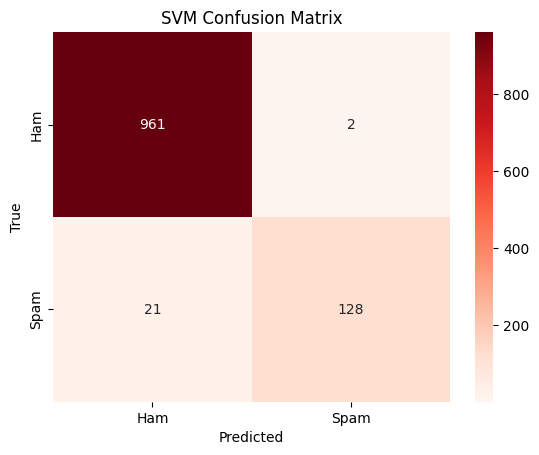

In [16]:
# Confusion Matrix for SVM
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, svm_y_pred, "SVM")

In [17]:
# Function to predict if a message is ham or spam using SVM
def predict_message_svm(message):
    message_vec = vectorizer.transform([message])
    prediction = svm_model.predict(message_vec)
    return 'ham' if prediction[0] == 0 else 'spam'

In [18]:
# Test the SVM function with your own input
user_input = input("Enter a message to classify with SVM: ")
print("The message is:", predict_message_svm(user_input))

Enter a message to classify with SVM: U have won a nokia 6230 plus a free digital camera. This is what u get when u win our FREE auction. To take part send NOKIA to 83383 now. POBOX114/14TCR/W1 16
The message is: spam
